## Assignment 4

Name: Annabelle Nguyen

Email: huonganh.nguyen@duke.edu

In [1]:
%matplotlib inline
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json

from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

import datetime

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
import sys

In [2]:
# Read the data files
main_df = pd.read_csv('ted_main.csv', encoding='utf-8')
transcripts_df = pd.read_csv('transcripts.csv', encoding='utf-8')

In [3]:
main_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
transcripts_df.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [5]:
print(main_df.shape)
print(transcripts_df.shape)

(2550, 17)
(2467, 2)


In [6]:
# join main_df with transcripts_df
combined_df = main_df.merge(transcripts_df, left_on="url", right_on="url", how="inner")

In [7]:
combined_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [8]:
combined_df.shape

(2467, 18)

In [9]:
# format dates in film_date and published_date
combined_df['film_date'] = combined_df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
combined_df['published_date'] = combined_df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [10]:
pop_talks = combined_df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:200]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006
1268,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012
649,How great leaders inspire action,Simon Sinek,34309432,16-09-2009
800,The power of vulnerability,Brené Brown,31168150,05-06-2010
444,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009
1695,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013
198,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008
5,Why we do what we do,Tony Robbins,20685401,01-02-2006
2033,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015
1338,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012


In [11]:
pop_talks.dtypes

title           object
main_speaker    object
views            int64
film_date       object
dtype: object

## My theories about what makes a TED talk popular

(Popularity is measured by the number of views and number of comments)

- Theory 1: Talks with positive titles attract a lot of views because the audience finds it uplifting to listen to positive messages.
- Theory 2: Talks with subjective titles attract a lot of views because the audience are interested in listening to stories about other people's lives, experiences, and perspectives.
- Theory 3: Educators and researchers have more credibility due to their profession, so they attract a lot of views.
- Theory 4: The top 200 most popular talks fall into a few common topics.

## Theories 1 & 2: Talks with positive and subjective titles attract a lot of views because the audience finds it uplifting to listen to positive messages, and are interested in listening to stories about other people's lives, experiences, and perspectives.

## Sentiment analysis on the title of popular talks

In [12]:
type(pop_talks.title[0])

unicode

In [13]:
# create 2 columns containing the result of sentiment analysis, called polarity and subjectivity
polarity = []
subjectivity = []
for title in pop_talks.title:
    polarity.append(TextBlob(title).sentiment[0])
    subjectivity.append(TextBlob(title).sentiment[1])
pop_talks['polarity'] = polarity
pop_talks['subjectivity'] = subjectivity

In [14]:
pop_talks.head()

,title,main_speaker,views,film_date,polarity,subjectivity
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006,0.00,0.000
1268,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012,0.00,0.000
649,How great leaders inspire action,Simon Sinek,34309432,16-09-2009,0.45,0.425
800,The power of vulnerability,Brené Brown,31168150,05-06-2010,0.00,0.000
444,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009,0.00,0.000


In [15]:
# calculate the percentage of polarity and subjectivity
print("The average polarity among the top 200 most popular talks is ", pop_talks['polarity'].mean())
print("The average subjectivity among the top 200 most popular talks is ", pop_talks['subjectivity'].mean())

('The average polarity among the top 200 most popular talks is ', 0.08490376984126985)
('The average subjectivity among the top 200 most popular talks is ', 0.2815540223665224)


Conclusions:

- The average polarity is very low, suggesting that the audience is attracted to talks whose titles are neutral. My theory 1 is proven to be true.
- The average subjectivity is low, suggesting that the audience is attracted to talks whose titles are not subjective. My theory 2 is proven to be wrong.

## Theory 3: Educators and researchers have more credibility due to their profession, so they attract a lot of views.

## Descriptive statistics about speaker occupation

In [16]:
# get a list of 200 most popular titles
pop_talks_titles = list(pop_talks.title)

In [17]:
# filter combined_df for talks whose titles belong to the top 200 most popular titles
combined_df[combined_df['title'].isin(pop_talks_titles)]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,01-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,Thank you. I have to tell you I'm both challen...
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,23-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,09-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,"On September 10, the morning of my seventh bir..."
13,242,"Jeff Han shows off a cheap, scalable multi-tou...",527,TED2006,05-02-2006,27,Jeff Han,Jeff Han: The radical promise of the multi-tou...,1,31-07-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 1014}...","[{'id': 685, 'hero': 'https://pe.tedcdn.com/im...",Human-computer interface designer,"['demo', 'design', 'interface design', 'techno...",The radical promise of the multi-touch interface,https://www.ted.com/talks/jeff_han_demos_his_b...,4531020,I'm really excited to be here today. I'll show...
21,185,Performer and web toymaker Ze Frank delivers a...,1136,TED2004,23-02-2004,26,Ze Frank,Ze Frank: Nerdcore comedy,1,24-08-2006,"[{'id': 7, 'name': 'Funny', 'count': 2799}, {'...","[{'id': 148, 'hero': 'https://pe.tedcdn.com/im...","Humorist, web artist","['collaboration', 'comedy', 'community', 'cult...",Nerdcore comedy,https://www.ted.com/talks/ze_frank_s_nerdcore_...,6141440,"You know, when Chris first approached me to sp..."
23,556,Anthropologist Helen Fisher takes on a tricky ...,1407,TED2006,23-02-2006,33,Helen Fisher,"Helen Fisher: Why we love, why we cheat",1,05-09-2006,"[{'id': 7, 'name': 'Funny', 'count': 780}, {'i...","[{'id': 307, 'hero': 'https://pe.tedcdn.com/im...","Anthropologist, expert on love","['cognitive science', 'culture', 'evolution', ...","Why we love, why we cheat",https://www.ted.com/talks/helen_fisher_tells_u...,9260764,I'd like to talk today about the two biggest s...
28,355,"""Tipping Point"" author Malcolm Gladwell gets i...",1050,TED2004,25-02-2004,37,Malcolm Gladwell,"Malcolm Gladwell: Choice, happiness and spaghe...",1,18-09-2006,"[{'id': 7, 'name': 'Funny', 'count': 1668}, {'...","[{'id': 93, 'hero': 'https://pe.tedcdn.com/ima...",Writer,"['business', 'choice', 'consumerism', 'culture...","Choice, happiness and spaghetti sauce",https://www.ted.com/talks/malcolm_gladwell_on_...,7023562,I think I was supposed to talk about my new bo...
29,970,"Dan Gilbert, author of ""Stumbli

In [18]:
combined_df.groupby('speaker_occupation').size().sort_values(ascending=False)

speaker_occupation
Writer                                  45
Designer                                34
Artist                                  34
Journalist                              32
Entrepreneur                            30
Architect                               28
Inventor                                27
Psychologist                            26
Photographer                            24
Filmmaker                               21
Economist                               20
Educator                                19
Neuroscientist                          19
Author                                  18
Roboticist                              16
Philosopher                             15
Biologist                               15
Physicist                               12
Global health expert; data visionary    10
Technologist                            10
Social psychologist                      9
Marine biologist                         9
Historian                          

Conclusion:

- Writers, designers, and artists (instead of educators and researchers) delivered one of the most popular talks. My theory 3 is proven to be wrong.

## Theory 4: The top 200 most popular talks fall into a few common topics.

## Wordcloud to analyze the most common words, and topic modeling to analyze the most common topics in the transcripts

In [19]:
# extract transcripts as strings
combined_transcripts = str(combined_df.transcript)

In [20]:
# drop end-of-line characters
combined_transcripts = re.sub('\s+',' ', combined_transcripts)

In [21]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have",
  "bday": "birthday"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

# Check:  your new string should be "congratulations on the new promotion"
print expandContractions(combined_transcripts)

0 Good morning. How are you?(Laughter)It's been ... 1 Thank you so much, Chris. And it is truly a gre... 2 (Music: "The Sound of Silence," Simon & Garfun... 3 If you are here today — and I am very happy that... 4 About 10 years ago, I took on the task to teac... 5 Thank you. I have to tell you I am both challen... 6 On September 10, the morning of my seventh bir... 7 I am going to present three projects in rapid f... 8 It's wonderful to be back. I love this wonderf... 9 I am often asked, "What surprised you about the... 10 I am going to take you on a journey very quickl... 11 I cannot help but this wish: to think about whe... 12 I am the luckiest guy in the world. I got to se... 13 I am really excited to be here today. I will show... 14 I have been at MIT for 44 years. I went to TED I... 15 (Music)(Music ends)(Applause)(Applause ends)Hi... 16 (Music)(Music ends)(Applause)Thank you!(Applau... 17 In terms of invention, I would like to tell you th... 18 My name is Lovegrove. I only know n

In [22]:
combined_transcripts = combined_transcripts.decode('utf-8')

In [23]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in combined_transcripts.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in combined_transcripts]

In [24]:
doc_clean[:100]

[[u'0',
  u'good',
  u'morning',
  u'youlaughterits',
  u'1',
  u'thank',
  u'much',
  u'chris',
  u'truly',
  u'gre',
  u'2',
  u'music',
  u'the',
  u'sound',
  u'silence',
  u'simon',
  u'garfun',
  u'3',
  u'today',
  u'\u2014',
  u'im',
  u'happy',
  u'that',
  u'4',
  u'10',
  u'year',
  u'ago',
  u'took',
  u'task',
  u'teac',
  u'5',
  u'thank',
  u'you',
  u'tell',
  u'im',
  u'challen',
  u'6',
  u'september',
  u'10',
  u'morning',
  u'seventh',
  u'bir',
  u'7',
  u'im',
  u'going',
  u'present',
  u'three',
  u'project',
  u'rapid',
  u'f',
  u'8',
  u'wonderful',
  u'back',
  u'love',
  u'wonderf',
  u'9',
  u'im',
  u'often',
  u'asked',
  u'what',
  u'surprised',
  u'the',
  u'10',
  u'im',
  u'going',
  u'take',
  u'journey',
  u'quickl',
  u'11',
  u'cant',
  u'help',
  u'wish',
  u'think',
  u'whe',
  u'12',
  u'im',
  u'luckiest',
  u'guy',
  u'world',
  u'got',
  u'se',
  u'13',
  u'im',
  u'really',
  u'excited',
  u'today',
  u'ill',
  u'show',
  u'14',
  u'ive',

In [25]:
type(doc_clean)

list

In [26]:
# Convert this to a string so we can use with the workcloud
str1 = ''.join(str(e) for e in doc_clean)

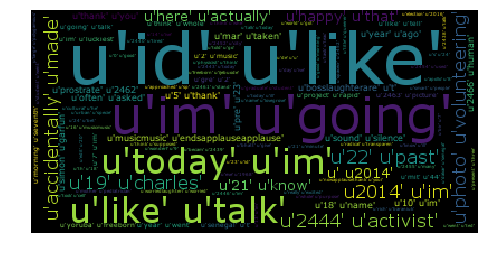

In [27]:
wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 1.0,
                      stopwords = stop # set or space-separated string
                      ).generate(str1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [30]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [31]:
# look at the result
print(ldamodel.print_topics(num_topics=5, num_words=5))

[(0, u'0.041*"im" + 0.017*"like" + 0.015*"talk" + 0.013*"today" + 0.013*"think"'), (1, u'0.038*"im" + 0.017*"today" + 0.017*"like" + 0.013*"think" + 0.013*"talk"'), (2, u'0.034*"im" + 0.016*"like" + 0.013*"think" + 0.013*"talk" + 0.011*"name"'), (3, u'0.038*"im" + 0.015*"think" + 0.015*"talk" + 0.013*"like" + 0.013*"id"'), (4, u'0.027*"im" + 0.019*"like" + 0.016*"today" + 0.014*"think" + 0.013*"talk"')]


Conclusion:

0.035*"im" + 0.015*"like" + 0.014*"today" + 0.013*"talk" + 0.013*"think"

0.038*"im" + 0.016*"talk" + 0.015*"like" + 0.014*"today" + 0.012*"think"

0.043*"im" + 0.020*"like" + 0.015*"think" + 0.014*"today" + 0.013*"talk"

0.032*"im" + 0.016*"think" + 0.016*"like" + 0.015*"talk" + 0.015*"today"

0.030*"im" + 0.017*"like" + 0.012*"think" + 0.012*"today" + 0.011*"name" 

At this point, the wordcloud suggests that speakers in the most popular talks speak with a casual and personal style. Meanwhile, topic modeling does not yield insightful results to help identify what topics are common among the top 200 most popular talks. Theory 4 has not been proven true or false.